# Análise Estatistica
### Amanda Luna, Renato Henriques e Sheila Silva
### 12 de junho de 2019

## Apresentação do problema

O Conjunto de Dados de Habitação de Boston consiste no preço das casas em vários locais em Boston, esse conjunto de dados é do ano de 1970. O conjunto de dados (dataset) nos disponibiliza quatorze variavéis distintas que tentaremos avaliar a relação entre elas para predizer os valores das casas através de regressão linear múltipla.

## Descrição do Dataset

O dataset escolhido consiste no preço das casas em vários lugares em Boston nos anos 70. Além disso, é composto por 506 observações, com 13 atributos . Juntamente com o preço, o conjunto de dados também fornece informações como:

1. CRIM - taxa de criminalidade per capita por cidade
2. ZN - proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés² (cerca de 2.322 m²)
3. INDUS - proporção de negócios não-varejistas por acre (4046m²) por cidade
4. CHAS - Variável de Charles River que mede quantidade de bairros próximos
5. NOX - concentração de óxidos nitricos
6. RM - número médio de quartos por habitação
7. AGE - proporção de unidades ocupadas construídas antes de 1940
9. RAD - índice de acessibilidade a rodovias radiais 
10. TAX - taxa de imposto predial de valor integral 10,000 dólares
11. PTRATIO - relação aluno-professor por cidade
12. B - 1000(Bk - 0.63)^2 onde Bk é a quantidade de negro por cidade
13. LSTAT - porcentagem de pessoas de classe baixa por cidade
14. PRICE - valor médio de residências

## Importando as bibliotecas

In [22]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

## Carregando o dataset

In [23]:
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## Tratamento de dados do dataset

Após carregar o dataset e adicionar a váriavel PRICE, referente ao preço das casas, fazemos o tratamento dos dados e obtivemos os seguintes resultados. Que são referentes a quantidade (count), média(mean), desvio padrão(std) e os valores minimos até os valores máximos para cada atributo, como podemos ver na tabela abaixo:

In [24]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Análise exploratória dos dados


Analisando a váriavel PRICE referente a o preço das casas, podemos observar que ela segue uma distribuição normal.

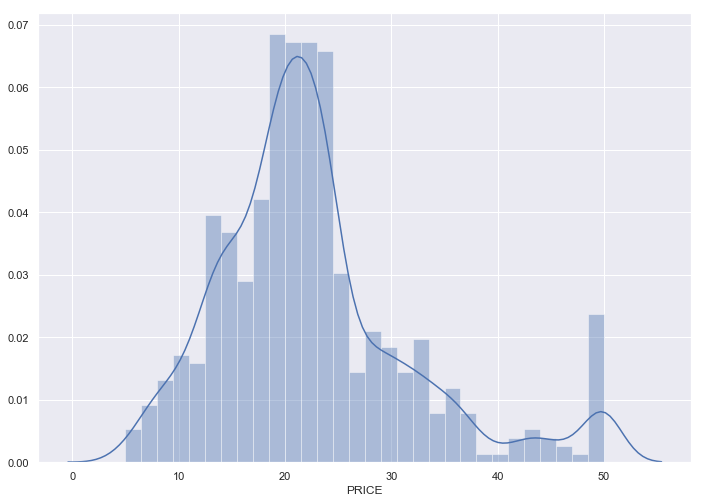

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['PRICE'], bins=30)
plt.show()

## Separando o dataset de treino e de teste

Basicamente, antes de dividir os dados para o conjunto de dados de teste e de treinamento, precisaríamos dividir o conjunto de dados em dois: valor alvo e valores de previsão. Vamos chamar valor alvo de Y e os valores de predição de X.
Portanto, temos:

Y = Preço das casas em Boston

X = Todos os outros atributos


In [26]:
from sklearn.model_selection import train_test_split
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print("quantidade de dados para treino de X/quantidade de atributos",X_train.shape)
print("quantidade de dados para teste de X/quantidade de atributos",X_test.shape)
print("quantidade de dados para treino de Y" , Y_train.shape)
print("quantidade de dados para teste de Y" , Y_test.shape)

quantidade de dados para treino de X/quantidade de atributos (339, 13)
quantidade de dados para teste de X/quantidade de atributos (167, 13)
quantidade de dados para treino de Y (339,)
quantidade de dados para teste de Y (167,)


Se também verificarmos a forma de cada variável, podemos descobrir que agora já recebemos nosso trem e testamos conjuntos de dados com a proporção de 66,66%(339) para dados de treino e 33,33%(167) para dados de teste.

## Regressão Linear Múltipla

A separação dos dados acima irá se encaixar em um modelo baseado em X_train e Y_train. Agora nós já temos o modelo linear, tentamos prever isso para o X_test e agora temos os valores de predição que são armazenados em Y_pred. Para visualizar as diferenças entre os preços reais e os valores previstos, também criamos um gráfico de dispersão que pode ser visualizado a seguir.

Text(0.5, 1.0, 'Preços vs Preços preditos')

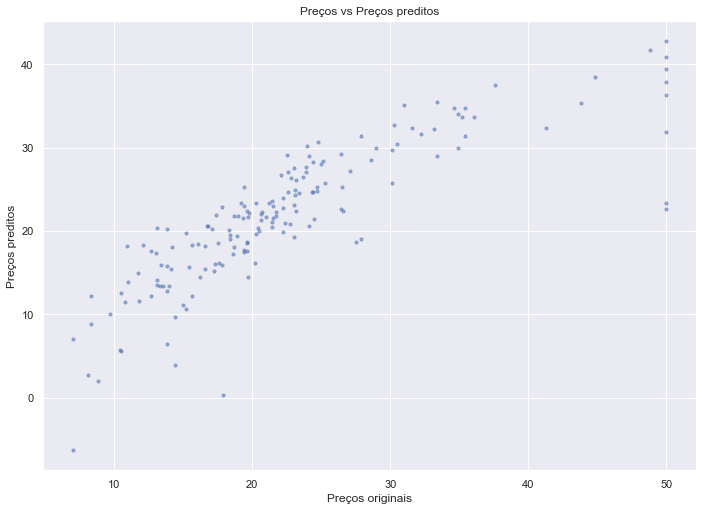

In [51]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred, s=10, alpha=0.5)
plt.xlabel("Preços originais")
plt.ylabel("Preços preditos")
plt.title("Preços vs Preços preditos")

O gráfico de dispersão deveria criar um gráfico linear, entretanto o modelo não se ajusta a 100% por isso não obtemos essa linearidade.

## Erro quadrático médio

Para verificar o nível de erro de um modelo, podemos calcular o erro quadrático médio. É um dos procedimentos para medir a média dos quadrados de erro. Basicamente, ele irá verificar a diferença entre o valor real e o valor previsto. Para usá-lo, podemos usar a função de erro quadrática média do scikit-learn executando o trecho de código a seguir:

In [28]:
diff = pd.DataFrame({'Original': Y_test, 'Predito': Y_pred})
diff1 = diff.head(20)
print(diff.head(15))

     Original    Predito
226      37.6  37.467236
292      27.9  31.391547
90       22.6  27.120196
373      13.8   6.468433
273      35.2  33.629667
417      10.4   5.670680
503      23.9  27.039467
234      29.0  29.927047
111      22.8  26.356613
472      23.2  22.452460
99       33.2  32.205044
339      19.0  21.786417
309      20.3  23.411384
304      36.1  33.608944
272      24.4  28.286195


In [29]:
diff.describe()

,Original,Predito
count,167.000000,167.000000
mean,22.523952,21.847663
std,9.711260,8.394229
min,7.000000,-6.249525
25%,16.400000,17.425063
50%,20.700000,21.725754
75%,25.050000,27.079831
max,50.000000,42.756775


Temos que os valores da média dos preços originais e preditos são 22.523952 e 21.847663 respectivamente.
Com isso, temos que o valor da raiz quadrada do erro médio é maior do que 10% do valores das médias (2.2523952 e 2.1847663). Portanto, o nosso modelo não possui uma boa acurácia, porém, consegue realizar predições razoáveis.

Alguns motivos para isto ter acontecido são:
1. Precisariamos de mais dados
2. Os atributos que utilizamos talvez não possuam muita correlação com o valor que tentamos predizer
3. Assumimos que os dados possuíam um relacionamento linear, o que pode não ser o caso 

O gráfico de barras abaixo consiste em uma amostra dos resultados comparativos dos preços originais e preditos pela regressão linear múltipla.


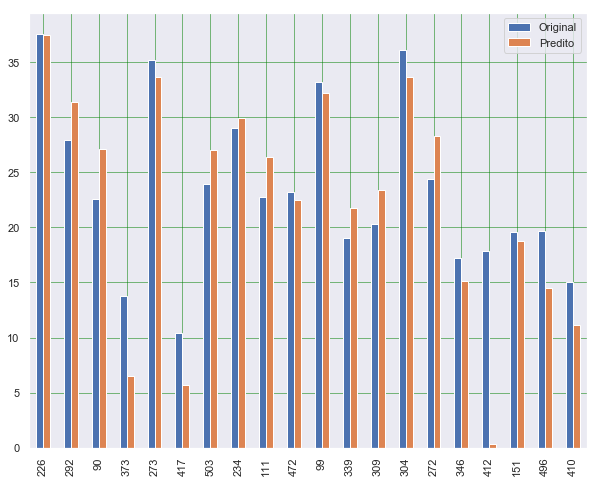

In [30]:
diff1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Análise de Resíduos pelo teste de Shapiro-Wilk

Analisando os resíduos desse modelo temos que pelo teste de normalidade de Shapiro-Wilk, obtivemos o resultado de 0.99047 com p-valor de 0.32761 que é maior que 0.05. Então temos que nossos dados seguem uma distribuição normal visto que não houve violação na normalidade dos resíduos. 

In [31]:
stats.shapiro(Y_pred)

(0.9904677271842957, 0.3276057243347168)

## Coeficiente de Determinação 

R é a correlação entre os preços reais e os preços preditos. R-square é o valor quadrático deste coeficiente de correlação, e tem uma interpretação muito interessante.

Ele representa a proporção da variabilidade na variável resposta explicada pela variável preditora ou variável explanatória. Também conhecido como coeficiente de determinação.

Ele nos dá uma idéia de quão bem podemos predizer a variável resposta a partir da(s) variável(eis) preditora(s).

Se os dados caem exatamente sobre a reta, $R^2=1$ e podemos predizer a resposta exatamente.

O resultado do coeficiente nos mostra que o modelo tem 70% de eficiencia em predizer os preços dos imoveis, isto significa que 69,56% da variável predita consegue ser explicada pelos regressores presentes no modelo.

In [32]:
coefficient_of_dermination = r2_score(Y_test, Y_pred)
print("Coefiente de correlação: ", coefficient_of_dermination)

Coefiente de correlação:  0.6956551656111607


## ANOVA

O valor-p obtido é superior ao nível de significancia(P > 0,05). Conclui-se que o modelo não é estatisticamente significativo, sendo assim, talvez seja necessário um reajuste do modelo para que este corresponda ao esperado. 

In [64]:
d_melt = pd.melt(diff.reset_index(), id_vars=['index'], value_vars=['Predito', 'Original'])
d_melt.columns = ['index', 'treatments', 'value']
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table) 

                     sum_sq     df         F    PR(>F)
C(treatments)     38.190185    1.0  0.463553  0.496443
Residual       27352.095048  332.0       NaN       NaN


## Teste de  Tukey

No estudo em questão que buscou-se comparar a distribuição dos grupos de amostras independentes, para isso utilizou-se da Análise de Variância ou ANOVA. Nesse caso, o resultado evidencia que o modelo não possui significancia, mas não indica se entre os grupos posssui alguma diferença significativa. Assim, se foi necessário utilizar testes de comparações múltiplas. 

Dentre os testes de comparações múltiplas mais utilizados, o Teste de Tukey se destaca por ser poderoso ao fazer comparações entre todos os pares e também por ser de fácil aplicação. Nele pode-se observar que entre alguns termos o teste não rejetia, logo entre eles possui alguma significancia. 

In [66]:
d_melt = pd.melt(bos.reset_index(), id_vars=['index'], value_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'])
d_melt.columns = ['index', 'treatments', 'value']
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
 group1  group2  meandiff   lower     upper   reject
----------------------------------------------------
  AGE      B     288.0991   277.05   299.1482  True 
  AGE     CHAS   -68.5057  -79.5548  -57.4566  True 
  AGE     CRIM   -64.9614  -76.0105  -53.9123  True 
  AGE     DIS    -64.7799  -75.829   -53.7308  True 
  AGE    INDUS   -57.4381  -68.4872  -46.389   True 
  AGE    LSTAT   -55.9218  -66.9709  -44.8727  True 
  AGE     NOX    -68.0202  -79.0693  -56.9711  True 
  AGE    PRICE   -46.0421  -57.0912  -34.993   True 
  AGE   PTRATIO  -50.1194  -61.1685  -39.0703  True 
  AGE     RAD    -59.0255  -70.0746  -47.9764  True 
  AGE      RM    -62.2903  -73.3394  -51.2412  True 
  AGE     TAX    339.6623  328.6132  350.7113  True 
  AGE      ZN    -57.2113  -68.2604  -46.1622  True 
   B      CHAS  -356.6049  -367.654 -345.5558  True 
   B      CRIM  -353.0605 -364.1096 -342.0114  True 
   B      DIS    -352.879 -363.9281 -341.8299 